# Important Library :

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
import cvxopt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import imageio
import os

# A) Correlation and Visualization :

In [ ]:
# Load the iris dataset
iris = load_iris()
data = iris.data
target = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for easier analysis
df = pd.DataFrame(data, columns=feature_names)
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
# Basic information
dimensions = df.shape
num_samples = len(df)

dimensions, num_samples


((150, 5), 150)

In [ ]:
# Descriptive statistics: mean and variance
means = df.mean()
variances = df.var()

print("\nMean of features:\n", means)
print("\nVariance of features:\n", variances)



Mean of features:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

Variance of features:
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
target               0.671141
dtype: float64


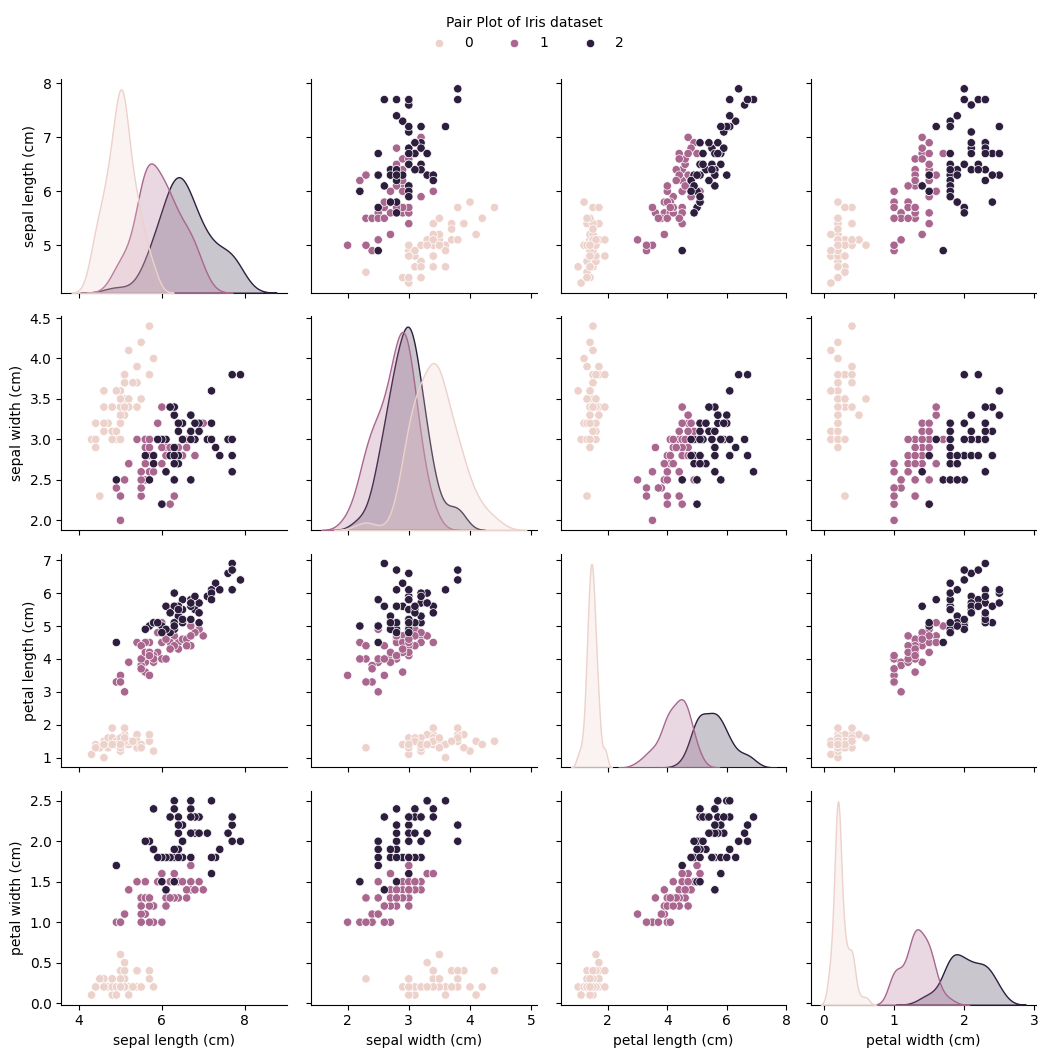

In [ ]:
ax = sns.pairplot(df , hue = 'target')
sns.move_legend(
    ax,"lower center",
    bbox_to_anchor=(.5,1) , ncol=3,title="Pair Plot of Iris dataset",frameon = False
)
plt.tight_layout()
plt.show()


In [ ]:
# Correlation matrix
correlation_matrix = df.corr()

correlation_matrix


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


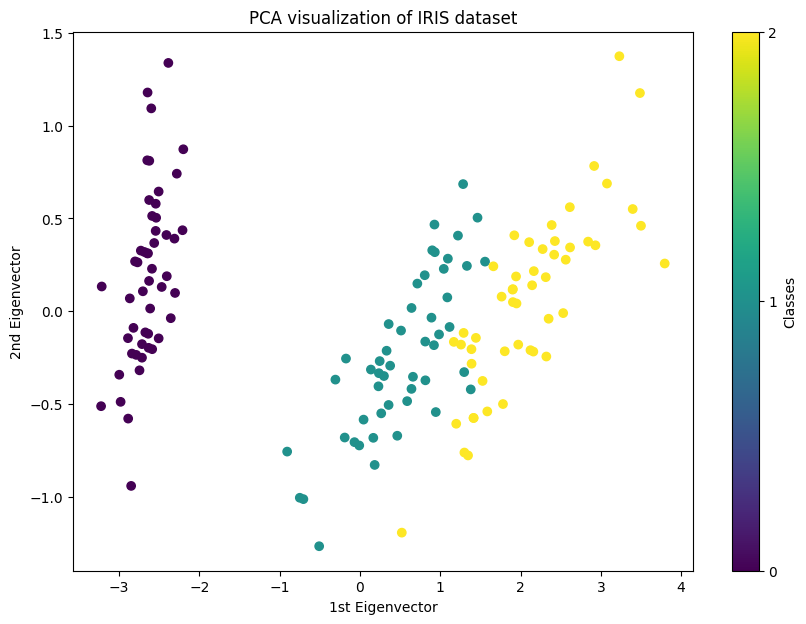

In [ ]:
# Perform t-SNE
pca = PCA(n_components=2, random_state=64)
pca_result = pca.fit_transform(data)

# Plot t-SNE result
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=target, cmap='viridis', marker='o')
plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
plt.title('PCA visualization of IRIS dataset')
plt.xlabel('1st Eigenvector')
plt.ylabel('2nd Eigenvector')
plt.show()


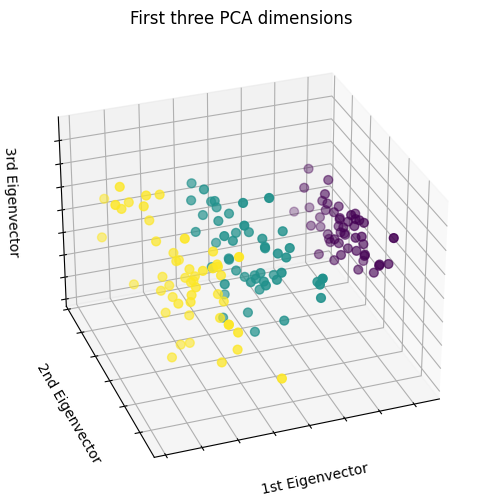

In [ ]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3 , random_state = 64).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()


# B)SVM with linear kernel :

## random state = 64

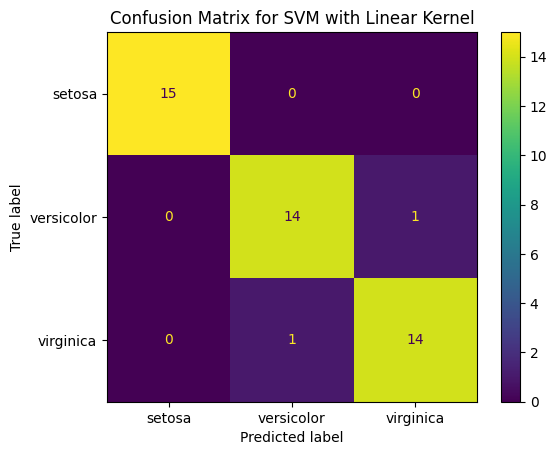

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



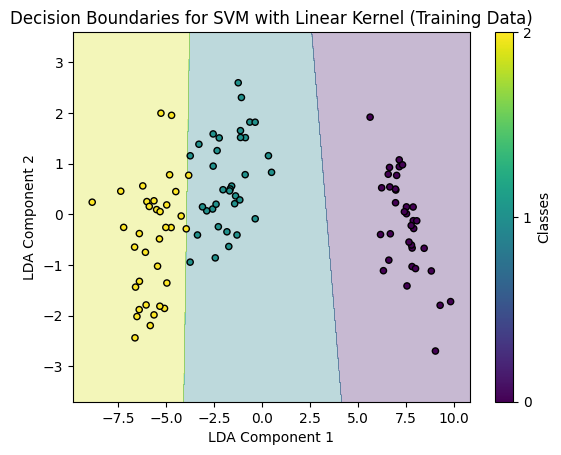

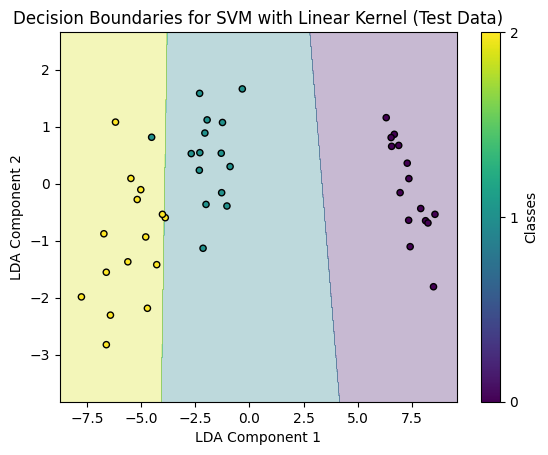

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=64, stratify=target)

scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.fit(X_test)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Predict using the trained classifier
y_test_pred = svm.predict(X_test_lda)

# Obtain and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=target_names)
cmd.plot()
plt.title('Confusion Matrix for SVM with Linear Kernel')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=target_names))


# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.show()

# Draw decision boundaries on the training data
plot_decision_boundaries(X_train_lda, y_train, svm, title='Decision Boundaries for SVM with Linear Kernel (Training Data)')

# Draw decision boundaries on the test data
plot_decision_boundaries(X_test_lda, y_test, svm, title='Decision Boundaries for SVM with Linear Kernel (Test Data)')

## random state = 0

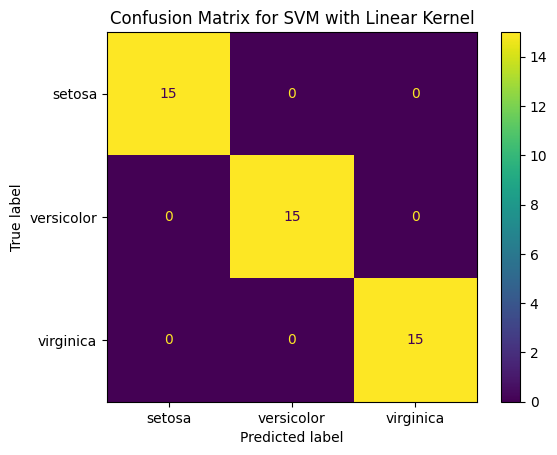

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



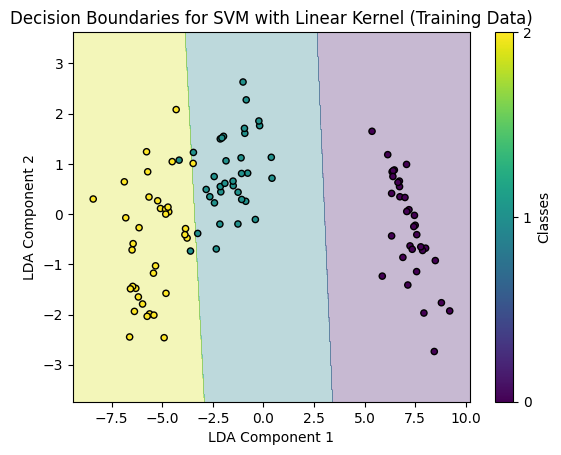

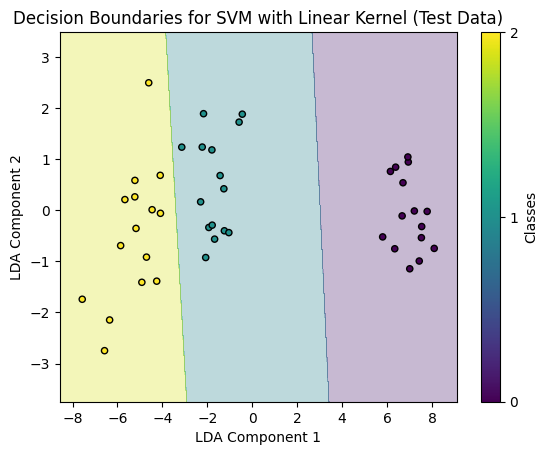

In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0, stratify=target)

scalar = StandardScaler()
scalar.fit_transform(X_train)
scalar.fit(X_test)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train SVM classifier with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train_lda, y_train)

# Predict using the trained classifier
y_test_pred = svm.predict(X_test_lda)

# Obtain and print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(conf_matrix, display_labels=target_names)
cmd.plot()
plt.title('Confusion Matrix for SVM with Linear Kernel')
plt.show()

print(classification_report(y_test, y_test_pred, target_names=target_names))


# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, title='Decision Boundaries'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(title)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    plt.show()

# Draw decision boundaries on the training data
plot_decision_boundaries(X_train_lda, y_train, svm, title='Decision Boundaries for SVM with Linear Kernel (Training Data)')

# Draw decision boundaries on the test data
plot_decision_boundaries(X_test_lda, y_test, svm, title='Decision Boundaries for SVM with Linear Kernel (Test Data)')

# C) SVC with Polynomial kernel :

<ipython-input-3-724c0ec90f0f>:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(train_plot_file))
<ipython-input-3-724c0ec90f0f>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(test_plot_file))
<ipython-input-3-724c0ec90f0f>:47: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(train_plot_file))
<i

Degree: 1
Accuracy: 1.00


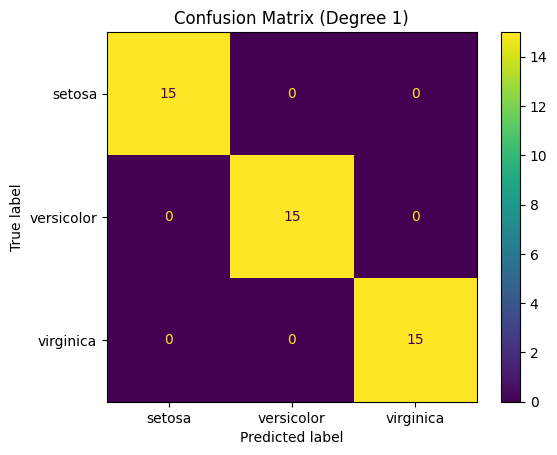

Degree: 2
Accuracy: 0.91


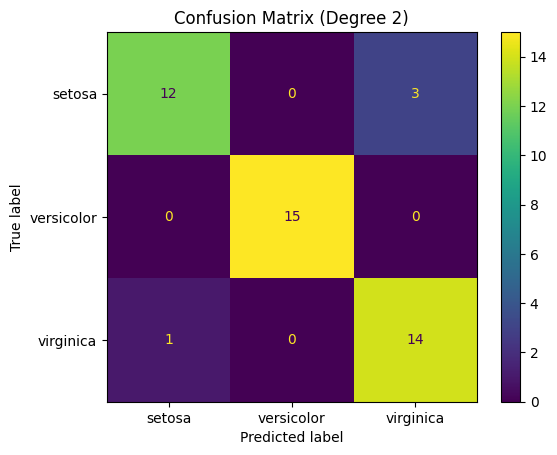

Degree: 3
Accuracy: 1.00


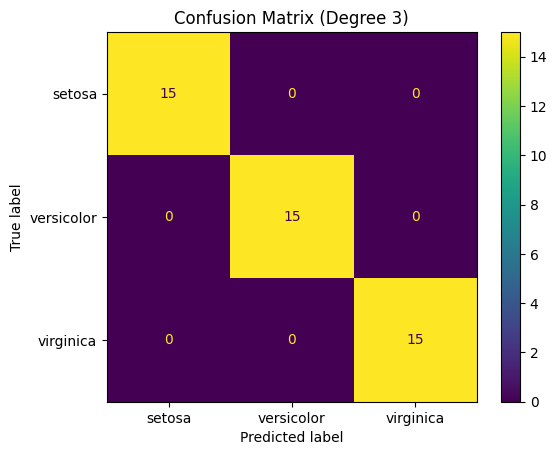

Degree: 4
Accuracy: 0.87


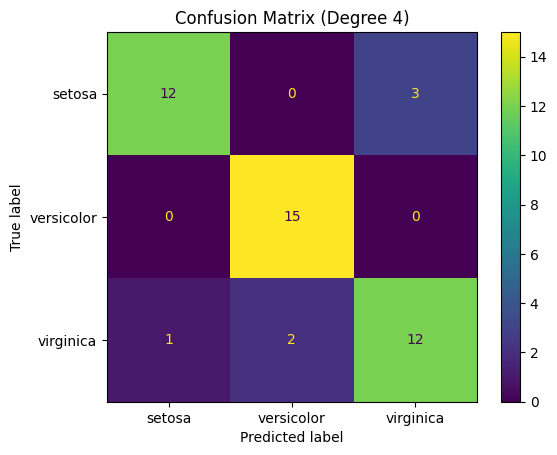

Degree: 5
Accuracy: 0.93


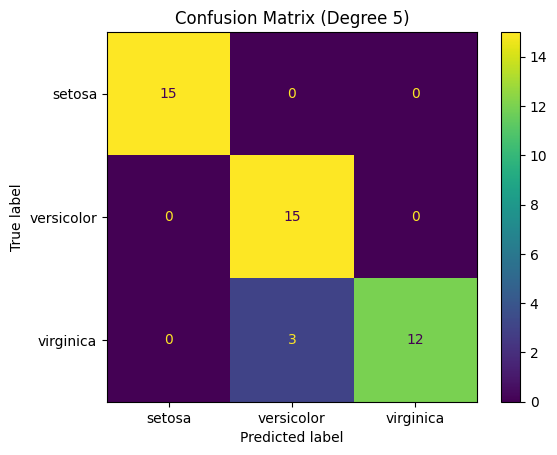

Degree: 6
Accuracy: 0.80


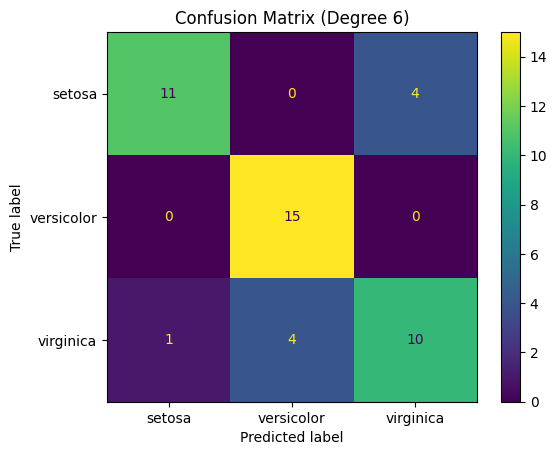

Degree: 7
Accuracy: 0.89


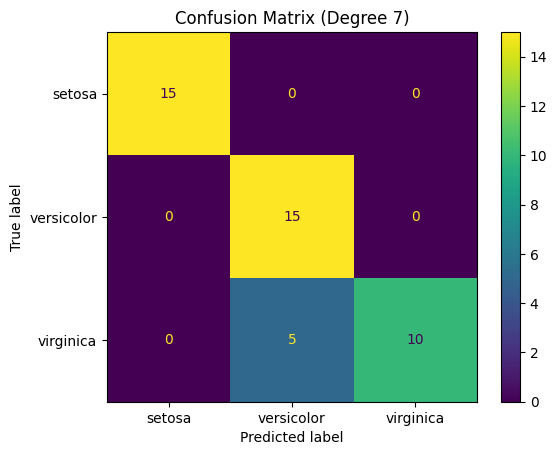

Degree: 8
Accuracy: 0.76


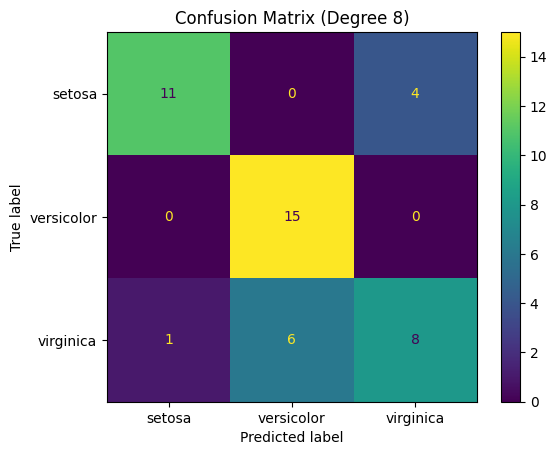

Degree: 9
Accuracy: 0.87


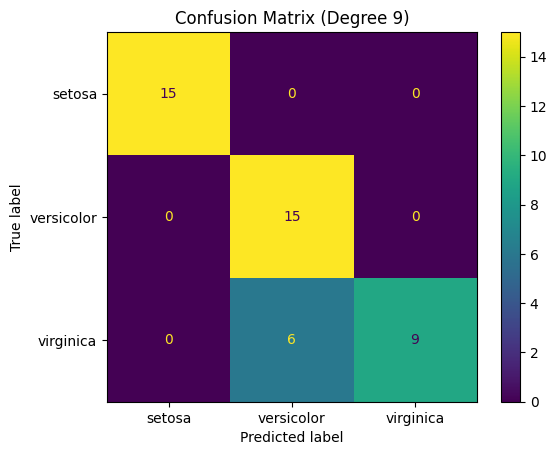

Degree: 10
Accuracy: 0.73


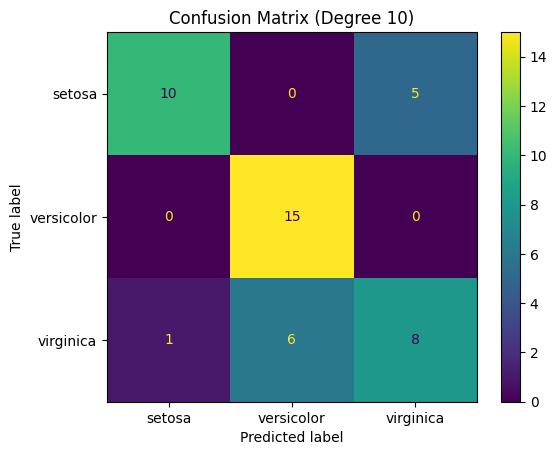

GIF created: decision_boundaries.gif


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0, stratify=target)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Prepare to store results and images for the GIF
results = []
images = []

# Function to plot decision boundaries and save the plot
def plot_decision_boundaries_and_save(X, y, model, degree, dataset_type='Training'):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree}) ({dataset_type} Data)')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'decision_boundary_degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

# Train and evaluate SVM with polynomial kernels of degrees 1 to 10
for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train_lda, y_train)

    # Predict on test data
    y_test_pred = svm_poly.predict(X_test_lda)

    # Compute confusion matrix and accuracy
    conf_matrix = confusion_matrix(y_test, y_test_pred)
    accuracy = accuracy_score(y_test, y_test_pred)
    results.append((degree, conf_matrix, accuracy))

    # Plot and save decision boundaries for training data
    train_plot_file = plot_decision_boundaries_and_save(X_train_lda, y_train, svm_poly, degree, dataset_type='Training')
    images.append(imageio.imread(train_plot_file))

    # Plot and save decision boundaries for test data
    test_plot_file = plot_decision_boundaries_and_save(X_test_lda, y_test, svm_poly, degree, dataset_type='Test')
    images.append(imageio.imread(test_plot_file))

# Create GIF from saved images with a slower frame duration
gif_filename = 'decision_boundaries.gif'
imageio.mimsave(gif_filename, images, duration=2)

# Display results
for degree, conf_matrix, accuracy in results:
    print(f'Degree: {degree}')
    print(f'Accuracy: {accuracy:.2f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=target_names)
    disp.plot(cmap='viridis')
    plt.title(f'Confusion Matrix (Degree {degree})')
    plt.show()

# Provide link to GIF
print(f'GIF created: {gif_filename}')


# D) SVM from scratch :

In [ ]:
class SVM(object):
    def __init__(self, kernel='polynomial', C=0, gamma=1, degree=3):
        self.C = float(C)
        self.gamma = float(gamma)
        self.degree = int(degree)
        self.kernel = kernel

    def polynomial_kernel(self, x, y, C=1, d=3):
        return (np.dot(x, y) + C) ** d

    def fit(self, X, y):
        n_samples, n_features = X.shape
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self.polynomial_kernel(X[i], X[j], self.C, self.degree)

        P = cvxopt.matrix(np.outer(y, y) * K + 1e+5 * np.identity(n_samples))
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y.astype(np.double), (1, n_samples), tc='d')
        b = cvxopt.matrix(0.0)

        if self.C == 0:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        cvxopt.solvers.options['show_progress'] = False
        cvxopt.solvers.options['abstol'] = 1e-10
        cvxopt.solvers.options['reltol'] = 1e-10
        cvxopt.solvers.options['feastol'] = 1e-10

        try:
            solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        except ValueError as e:
            print("Solver failed due to rank deficiency.")
            return False

        alphas = np.ravel(solution['x'])

        sv = alphas > 1e-10
        ind = np.arange(len(alphas))[sv]
        self.alphas = alphas[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        if len(self.alphas) > 0:
            self.b = 0
            for n in range(len(self.alphas)):
                self.b += self.sv_y[n]
                self.b -= np.sum(self.alphas * self.sv_y * K[ind[n], sv])
            self.b = self.b / len(self.alphas)
        else:
            self.b = 0

        if self.kernel == 'linear':
            self.w = np.zeros(n_features)
            for n in range(len(self.alphas)):
                self.w += self.alphas[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None
        return True

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.alphas, self.sv_y, self.sv):
                    s += a * sv_y * self.polynomial_kernel(X[i], sv, self.C, self.degree)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

In [ ]:
def plotSVC(X, y, models, degree, dataset_type='Training'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)

    Z = np.zeros((xx.ravel().shape[0], len(models)))
    for i, model in enumerate(models):
        Z[:, i] = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.colorbar(scatter, ticks=range(len(target_names)), label='Classes')
    plt.title(f'Decision Boundaries for SVM with Polynomial Kernel (Degree {degree}) ({dataset_type} Data)')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')
    filename = f'decision_boundary_degree_{degree}_{dataset_type}.png'
    plt.savefig(filename)
    plt.close()
    return filename

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 1, Accuracy: 0.33


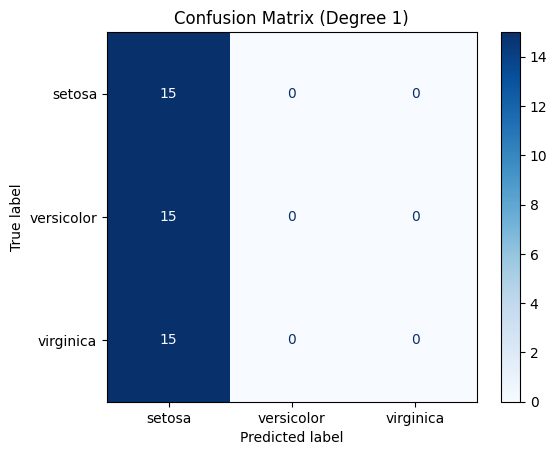

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 2, Accuracy: 0.38


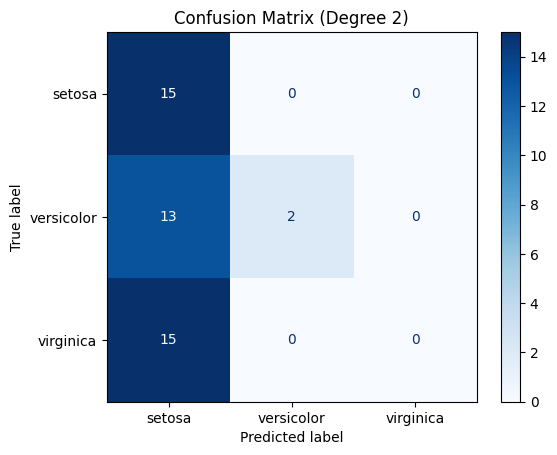

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 3, Accuracy: 0.96


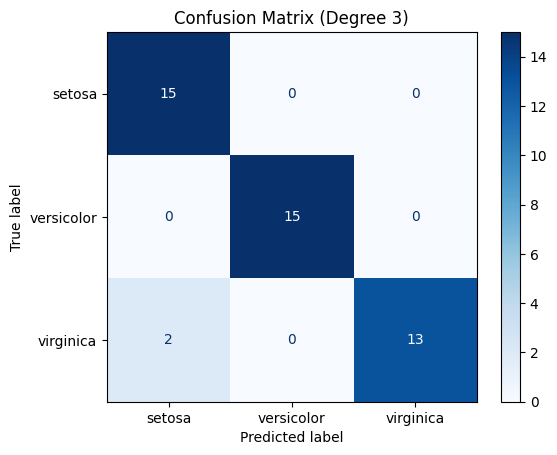

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 4, Accuracy: 1.00


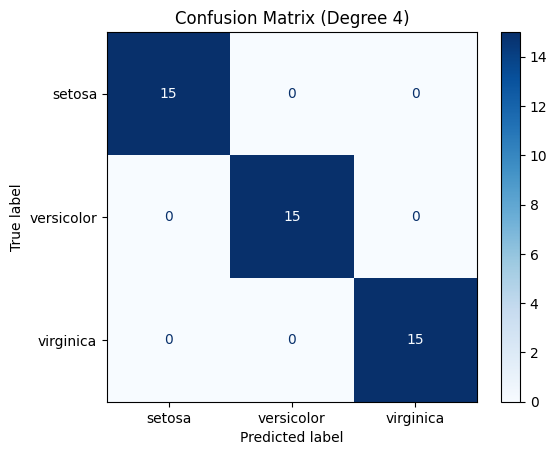

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 5, Accuracy: 1.00


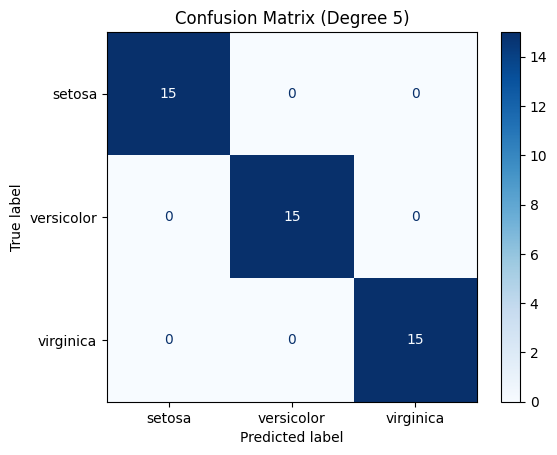

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 6, Accuracy: 1.00


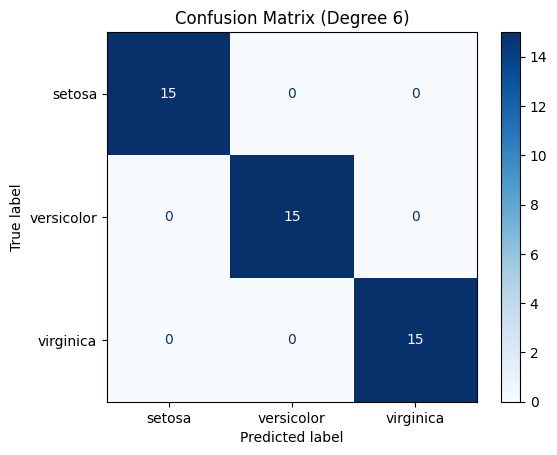

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 7, Accuracy: 0.98


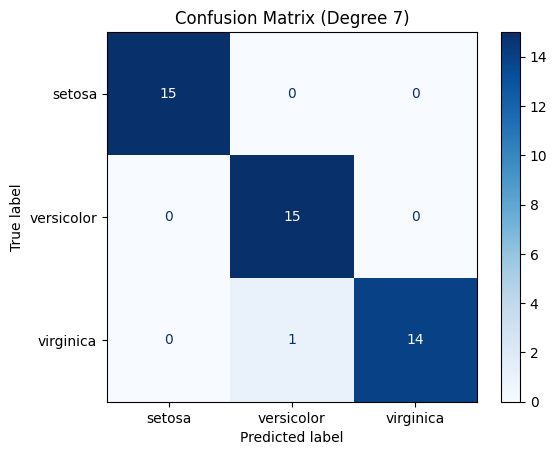

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 8, Accuracy: 0.40


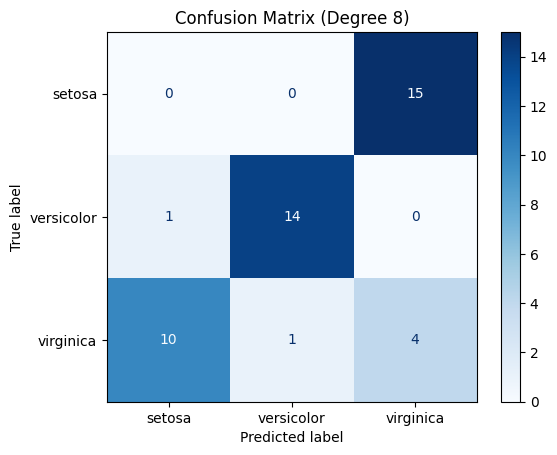

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 9, Accuracy: 0.16


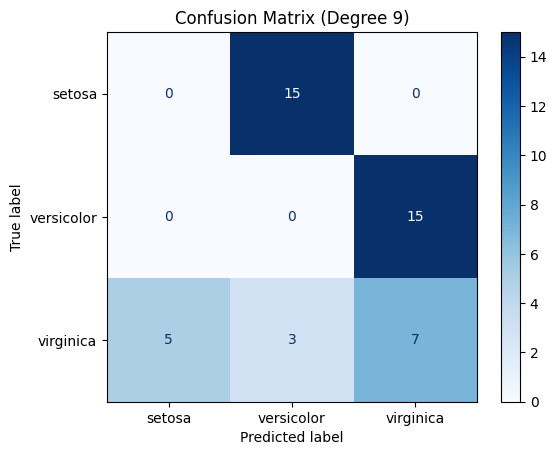

<ipython-input-5-971dda7b2985>:28: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
<ipython-input-5-971dda7b2985>:31: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Degree: 10, Accuracy: 0.18


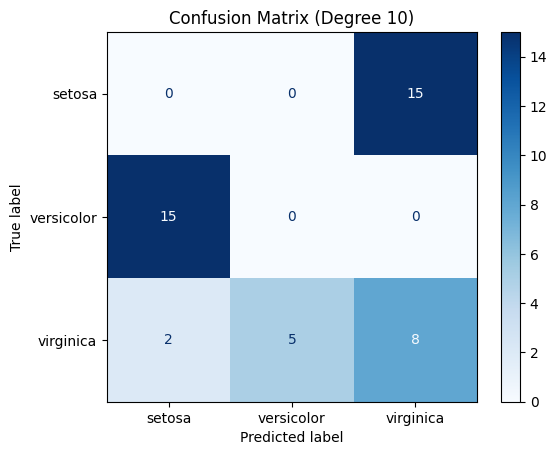

GIF saved as decision_boundaries.gif


In [ ]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0, stratify=target)

# Reduce dimensionality using LDA on the training data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


# Prepare to store results and images for the GIF
results = []
images = []


# One-vs-rest classification using polynomial kernels of degrees 1 to 10
for degree in range(1, 11):
    svm_models = []

    for i in range(len(target_names)):
        y_train_binary = np.where(y_train == i, 1, -1)
        svm = SVM(kernel='polynomial', degree=degree, C=1.0)
        svm.fit(X_train_lda, y_train_binary)
        svm_models.append(svm)


    # Plot and save decision boundaries for the training data
    filename = plotSVC(X_train_lda, y_train, svm_models, degree, 'Training')
    images.append(imageio.imread(filename))
    # Plot and save decision boundaries for the testing data
    filename = plotSVC(X_test_lda, y_test, svm_models, degree, 'Testing')
    images.append(imageio.imread(filename))

    y_test_pred = np.zeros(len(y_test))

    for i in range(len(target_names)):
        y_test_pred_binary = svm_models[i].predict(X_test_lda)
        y_test_pred[y_test_pred_binary == 1] = i

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_test_pred)
    print(f'Degree: {degree}, Accuracy: {accuracy:.2f}')
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix (Degree {degree})')
    plt.show()

# Save the images as a GIF
gif_filename = 'decision_boundaries.gif'
imageio.mimsave(gif_filename, images, duration=10)

# Print the GIF filename
print(f'GIF saved as {gif_filename}')